In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy.stats import nbinom, poisson

In [2]:
def nbinom_prob(maxx,n, p, dist ='pdf'):
    kk = [k for k in range(maxx+1)]
    if dist=='pdf':
        prob = [nbinom.pmf(k, n=n, p=p) for k in kk]
    elif dist =='cdf':
        prob = [nbinom.cdf(k, n=n, p=p) for k in kk]
    else:
        raise exception('prob is not defined')
    return kk,prob

def poisson_prob(maxx, mu, dist ='pdf'):
    kk = [k for k in range(maxx+1)]
    if dist=='pdf':
        prob = [poisson.pmf(k=k, mu=mu) for k in kk]
    elif dist =='cdf':
        prob = [poisson.cdf(k=k, mu=mu) for k in kk]
    else:
        raise exception('prob is not defined')
    return kk,prob

def ecdf(x):
    xx = np.sort(x)
    cdf = np.linspace(0, 1, len(xx), endpoint=False)
    return(xx, cdf)

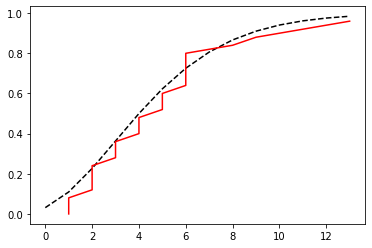

In [3]:
# generate a negbin random number
N = 25
n = 5.0
p = 0.5

x = nbinom.rvs(n=n,p =p, size=N)
kk, tcdf = nbinom_prob(max(x), n=n, p= p, dist ='cdf')
plt.plot(kk, tcdf, 'k--');
xx, cdf = ecdf(x)
plt.plot(xx, cdf, 'r-');

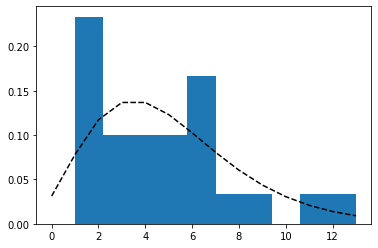

In [4]:
kk, tpdf = nbinom_prob(max(x), n=n, p= p, dist ='pdf')
plt.plot(kk, tpdf, 'k--');
plt.hist(x, density=True);

In [5]:
import statsmodels.api as sm
X = np.ones_like(x)
res = sm.NegativeBinomial(x,X).fit(start_params=[3,0.2])
print(res.summary())
mmu = np.exp(res.params[0])
pp = 1/(1+np.exp(res.params[0])*res.params[1])
nn = np.exp(res.params[0]*pp)/(1-pp)

print(mmu, nn, pp)

Optimization terminated successfully.
         Current function value: 2.409381
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                   25
Model:               NegativeBinomial   Df Residuals:                       24
Method:                           MLE   Df Model:                            0
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:               1.084e-12
Time:                        16:46:08   Log-Likelihood:                -60.235
converged:                       True   LL-Null:                       -60.235
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5518      0.125     12

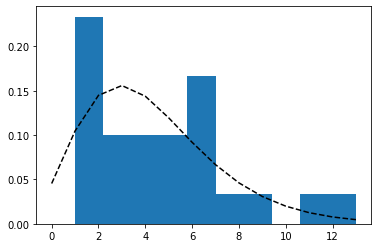

In [6]:
kk, tpdf = nbinom_prob(max(x), n=nn, p= pp, dist ='pdf')
plt.plot(kk, tpdf, 'k--');
plt.hist(x, density=True);

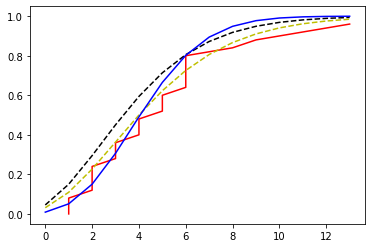

In [7]:
kk, tpdf = nbinom_prob(max(x), n=nn, p= pp, dist ='cdf')
plt.plot(kk, tpdf, 'k--');
xx, cdf = ecdf(x)
plt.plot(xx, cdf, 'r-');

kk, tcdf = nbinom_prob(max(x), n=n, p= p, dist ='cdf')
plt.plot(kk, tcdf, 'y--');

kk, tcdf = poisson_prob(max(x), mu=np.mean(x), dist ='cdf')
plt.plot(kk, tcdf, 'b-');

In [2]:
# We will worry about deciding the count model later